The given analysis is performed to predict someone's chance of admission in the higher education institute depending upon CGPA,GRE score, TOEFL score,University Rating, SOP,LOR,Research.

-Importing all the required libraries to clean and visualize data<br>
-**Opening file**<br>
-*Dropping serial number column*<br>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import skew

In [2]:
data = pd.read_csv(r"C:\Users\daman\Downloads\archive\Admission_Predict_Ver1.1.csv")
data.info()
data.head()
data.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [3]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
data.drop(['Serial No.'],axis = 1, inplace = True)

# Visualize data to check for skewnwness
## Lets see how GRE Score Impacts Chance of admission


([<matplotlib.axis.XTick at 0x218722e1c70>,
 <a list of 17 Text major ticklabel objects>)

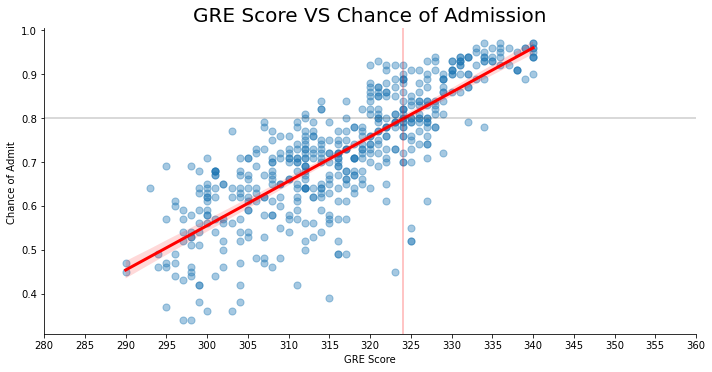

In [5]:
g = sns.lmplot("GRE Score","Chance of Admit ", data = data, order = 1, line_kws ={'color':'red','linewidth':3}, height = 5, aspect =2,
               scatter_kws = {'s':50,'alpha':0.4})
plt.title('GRE Score VS Chance of Admission', size=20)
plt.axhline(0.8,color = 'black', alpha = 0.2)
plt.axvline(324,color='red', alpha = 0.3 )
plt.xticks(np.arange(280,365,5))

## Lets see the distribution of GRE score, its median, mode and skewness


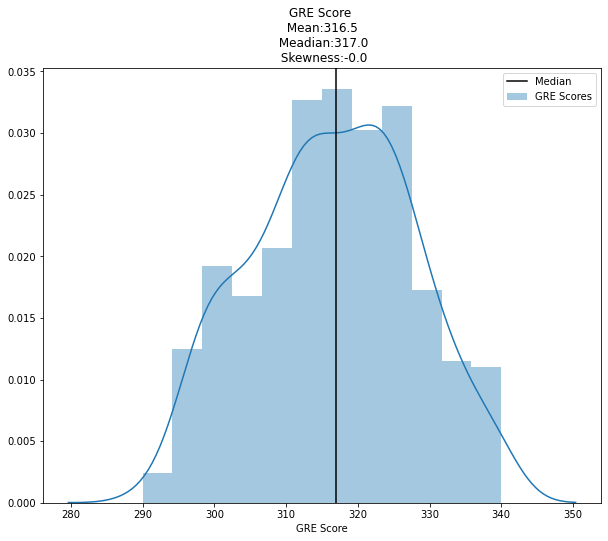

In [6]:
plt.figure(figsize=(10,8))
g = sns.distplot(data['GRE Score'], label = 'GRE Scores')
plt.title('GRE Score \n Mean:{0:.1f} \n Meadian:{1:.1f}\n Skewness:{2:.1f}'.format(data['GRE Score'].mean(), data['GRE Score'].median(),skew(data['GRE Score'].values),size = 20))
l1 = plt.axvline(data['GRE Score'].median(), color = 'black', label = 'Median')
plt.legend()

## Now lets see the distribution of TOEFL score and its impact on the Chance of Admission

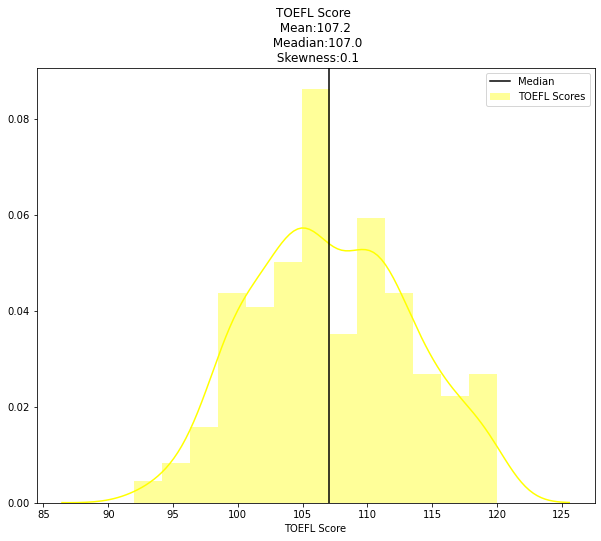

In [7]:
plt.figure(figsize=(10,8))
g = sns.distplot(data['TOEFL Score'], label = 'TOEFL Scores',color='Yellow')
plt.title('TOEFL Score \n Mean:{0:.1f} \n Meadian:{1:.1f}\n Skewness:{2:.1f}'.format(data['TOEFL Score'].mean(), data['TOEFL Score'].median(),skew(data['TOEFL Score'].values),size = 20))
l1 = plt.axvline(data['TOEFL Score'].median(), color = 'black', label = 'Median')
plt.legend()

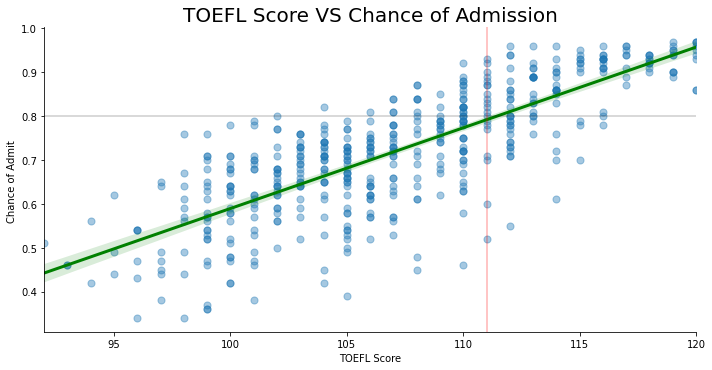

In [8]:
g = sns.lmplot("TOEFL Score","Chance of Admit ", data = data, order = 1, line_kws ={'color':'green','linewidth':3}, height = 5, aspect =2,
               scatter_kws = {'s':50,'alpha':0.4})
plt.title('TOEFL Score VS Chance of Admission', size=20)
plt.axhline(0.8,color = 'black', alpha = 0.2)
plt.axvline(111,color='red', alpha = 0.3 )


## Now lets study the effect of CGPA on Chance of Admission and its distribution

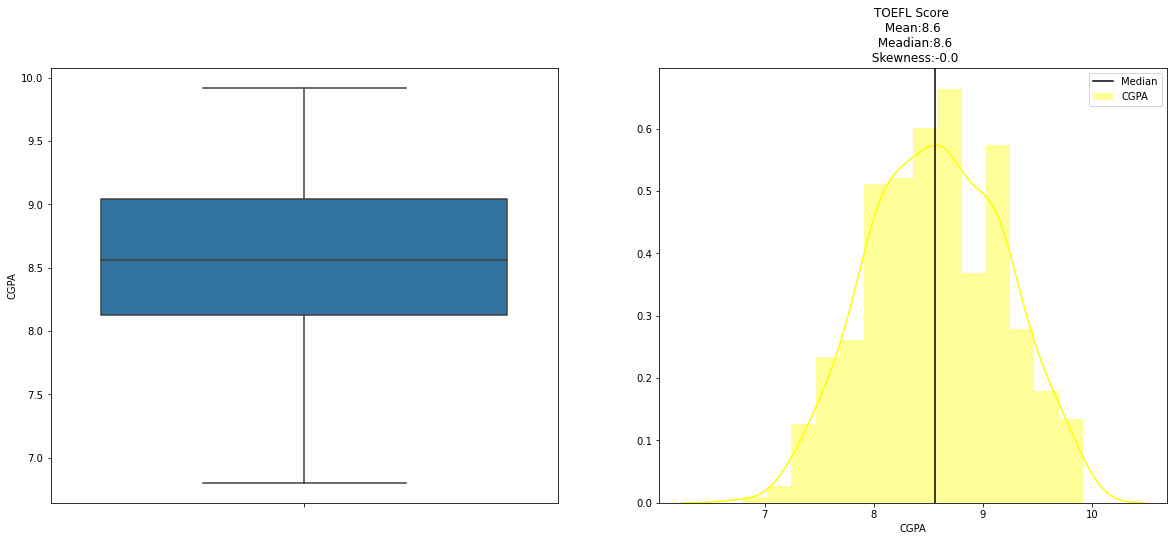

In [9]:
fig =plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.boxplot(data['CGPA'],orient = 'v',ax = ax1 )
sns.distplot(data['CGPA'], label = 'CGPA',color='Yellow',ax  = ax2)
ax2.set_title('TOEFL Score \n Mean:{0:.1f} \n Meadian:{1:.1f}\n Skewness:{2:.1f}'.format(data['CGPA'].mean(),
                                        data['CGPA'].median(),skew(data['CGPA'].values),size = 20))
ax2.axvline(data['CGPA'].median(), color = 'black', label = 'Median')
plt.legend()

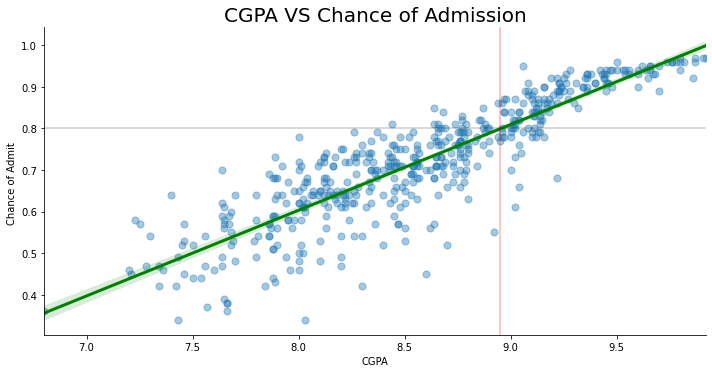

In [10]:
g = sns.lmplot("CGPA","Chance of Admit ", data = data, order = 1, line_kws ={'color':'green','linewidth':3}, height = 5, aspect =2,
               scatter_kws = {'s':50,'alpha':0.4})
plt.title('CGPA VS Chance of Admission', size=20)
plt.axhline(0.8,color = 'black', alpha = 0.2)
plt.axvline(8.95,color='red', alpha = 0.3 )



## Lets see distribution of Rating across the universities


Text(0.5, 1.0, 'Number of universities of each rating')

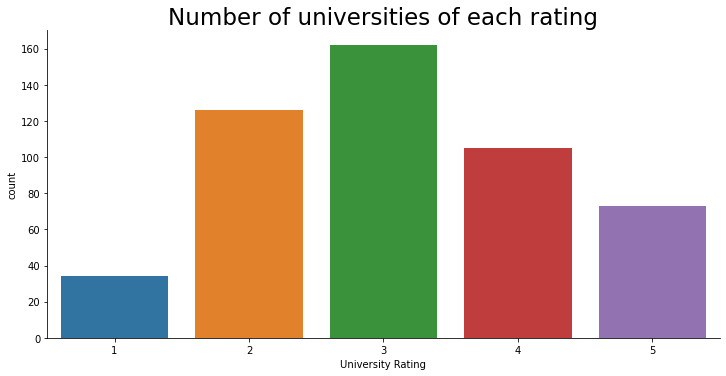

In [11]:
sns.catplot('University Rating',data=data,kind='count',height=5,aspect=2)
plt.title('Number of universities of each rating',size=23)

## Now going into comprehensive analysis to see the patterns
Intution says that for university with high rankings only accept students with high CGPA and TOEFL score, so lets see if that is correct.


In [12]:
d1 = data[data['University Rating'] == 1]
d2 = data[data['University Rating'] == 2]
d3 = data[data['University Rating'] == 3]
d4 = data[data['University Rating'] == 4]
d5 = data[data['University Rating'] == 5]


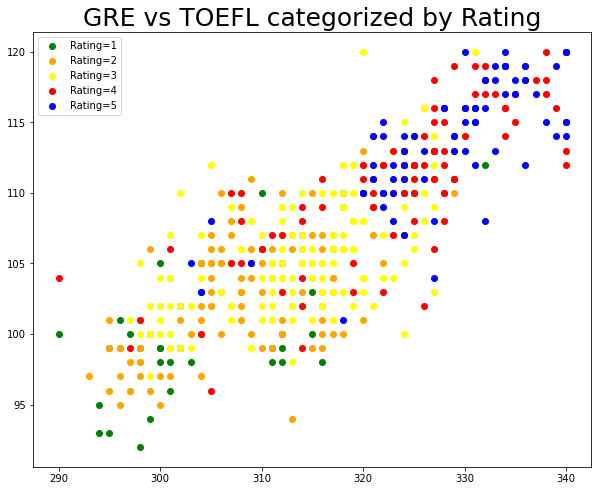

In [13]:
fig2 = plt.figure(figsize=(10,8))
ax1 = fig2.add_subplot(111)
r1 = ax1.scatter(d1['GRE Score'],d1['TOEFL Score'],color = 'green', label= 'Rating=1')
r1 = ax1.scatter(d2['GRE Score'],d2['TOEFL Score'],color = 'orange', label= 'Rating=2')
r1 = ax1.scatter(d3['GRE Score'],d3['TOEFL Score'],color = 'yellow', label= 'Rating=3')
r1 = ax1.scatter(d4['GRE Score'],d4['TOEFL Score'],color = 'red', label= 'Rating=4')
r1 = ax1.scatter(d5['GRE Score'],d5['TOEFL Score'],color = 'blue', label= 'Rating=5')
ax1.set_title('GRE vs TOEFL categorized by Rating',size = 25)
plt.legend()

Lets see combined effect of TOEFL, CGPA and GRE on chance of Addmission

In [14]:
data['Scaled_CGPA'] = ((data['CGPA'] - data['CGPA'].min())/(data['CGPA'].max() - data['CGPA'].min()))

In [15]:
data1 = data[data['Chance of Admit ']>0.70]
data2 = data[data['Chance of Admit ']<0.70]

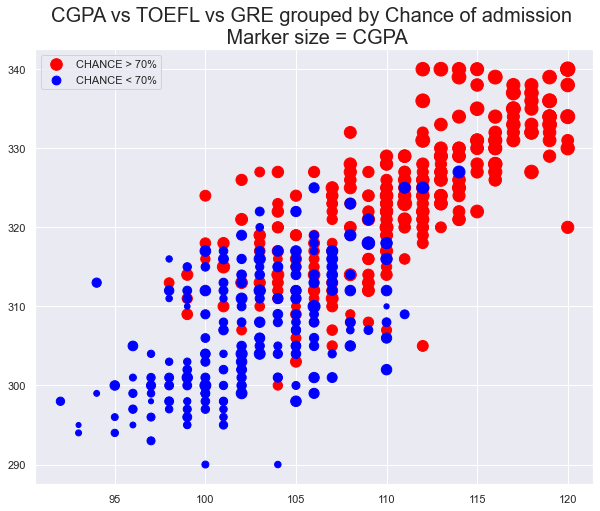

In [16]:
sns.set()
fig3 = plt.figure(figsize=(10,8))
ax3 =  fig3.add_subplot(111)
e1 = ax3.scatter(data1['TOEFL Score'],data1['GRE Score'],color = 'red',s= data1['Scaled_CGPA']*200,label = 'CHANCE > 70%')
e1 = ax3.scatter(data2['TOEFL Score'],data2['GRE Score'],color = 'blue',s= data2['Scaled_CGPA']*200,label = 'CHANCE < 70%')
ax3.set_title('CGPA vs TOEFL vs GRE grouped by Chance of admission \n Marker size = CGPA', size = 20)
plt.legend()

Lets see how chance of admission varies with LOR and SOP

Text(0.5, 1.0, 'LOR vs Chance of Admit')

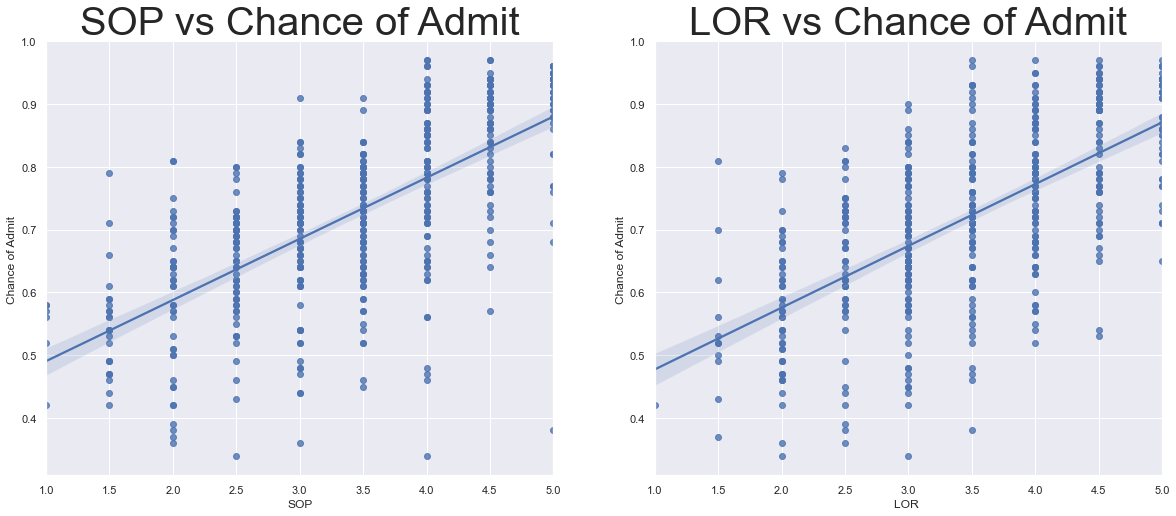

In [17]:
fig5 =plt.figure(figsize=(20,8))
ax1 = fig5.add_subplot(121)
ax2 = fig5.add_subplot(122)
l1 = sns.regplot('SOP','Chance of Admit ',data = data, ax = ax1)
l2 = sns.regplot('LOR ','Chance of Admit ',data = data, ax = ax2)
ax1.set_title('SOP vs Chance of Admit', size = 40)
ax2.set_title('LOR vs Chance of Admit', size = 40)

Lets see how research impacts chance of Admission

Text(0.5, 8.95999999999998, 'Research')

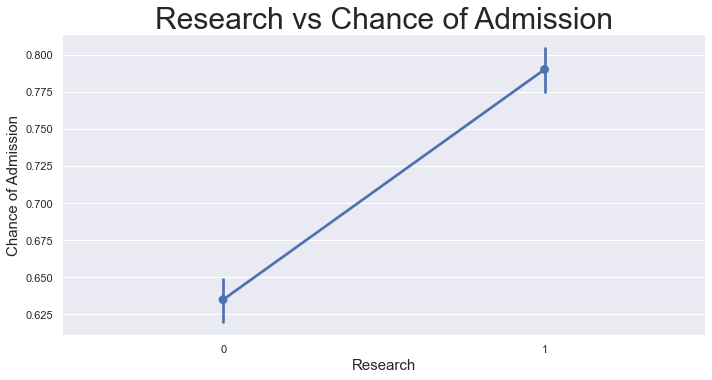

In [18]:
sns.catplot('Research','Chance of Admit ', data = data, kind = 'point', height = 5, aspect = 2)
plt.title('Research vs Chance of Admission', size = 30)
plt.ylabel('Chance of Admission', size = 15)
plt.xlabel('Research', size = 15)

## Now lets see the correlation among all the given variables using a heat map

In [19]:
data.drop('Scaled_CGPA', axis = 1, inplace = True)

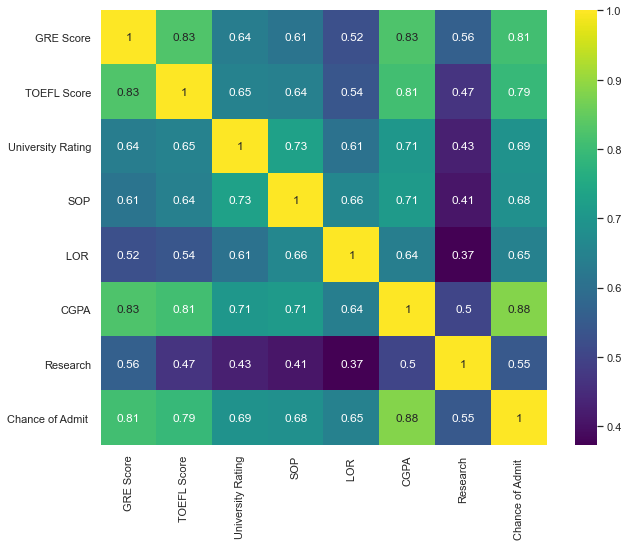

In [20]:
Correlation = data.corr()
plt.figure(figsize= (10,8))
sns.heatmap(Correlation,annot = True, cmap = 'viridis')

WHAT follows is 
# MACHINE LEARNING

Lets first start with the old fashioned multiple linear regression since our independent variables seem to have linear dependence on the dependent variable

In [21]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [23]:
x = data[['GRE Score', 'TOEFL Score','University Rating', 'SOP','LOR ','CGPA','Research']].values

In [24]:
y = data['Chance of Admit ']

In [25]:
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.intercept_
reg.coef_
y_predict = reg.predict(x_test)
MSE =mean_squared_error(y_predict,y_test)
Rscore_train = reg.score(x_train,y_train)
Rscore_test=reg.score(x_test, y_test)


In [27]:
MSE, Rscore_train, Rscore_test

(0.0028976275643076924, 0.8120274217951601, 0.858132178058301)

In [28]:
Y_predict_train = reg.predict(x_train)
Residual = (Y_predict_train - y_train)

In [29]:
Studentized_Residual = (Residual - (np.mean(Residual))/(np.std(Residual)))

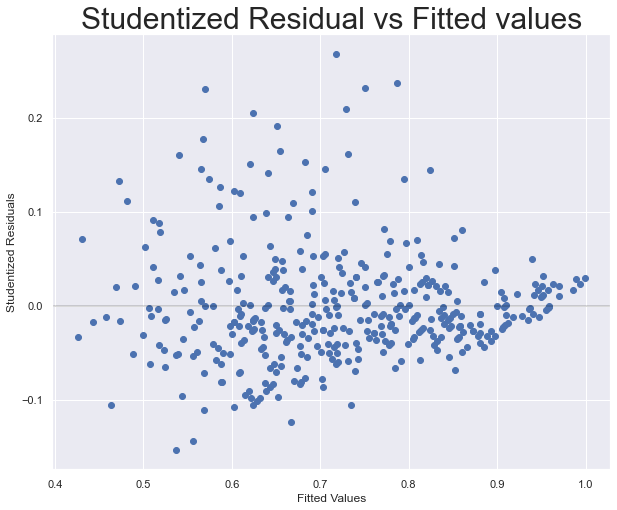

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(Y_predict_train,Studentized_Residual ) 
plt.title('Studentized Residual vs Fitted values', size = 30)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.axhline(0,color = 'black',alpha = 0.2)


In [31]:
Root_Mean_Squared_Error = np.sqrt(MSE)
Root_Mean_Squared_Error

0.05382961605201817

In [32]:
Linear_Regression_DF = pd.DataFrame()
Linear_Regression_DF['Fitted']=(y_predict)
Linear_Regression_DF['Actual'] =(y_test.values)


Text(0.5, 1.0, 'Linear Regression \n RMSE = 0.05382961605201817')

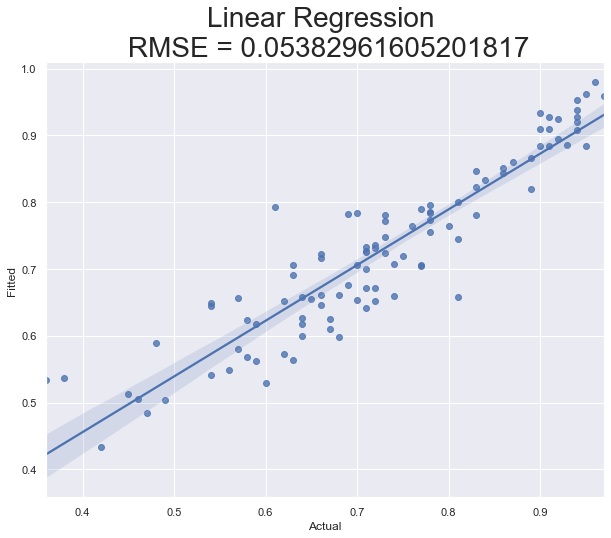

In [33]:
plt.figure(figsize=(10,8))
sns.regplot('Actual','Fitted', data = Linear_Regression_DF)
plt.title('Linear Regression \n RMSE = {0}'.format(Root_Mean_Squared_Error),size = 28)

Multiple Linear regression produced some grear results, however its worth trying other refined forms of regression. So lets see how LASSO Regression performs on the given dataset

In [34]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
MSE_Lasso =mean_squared_error(y_test, lasso.predict(x_test))

In [35]:
RMSE_Lasso = np.sqrt(MSE_Lasso)
RMSE_Lasso

0.05389061540255294

In [36]:
lasso.coef_

array([0.00163182, 0.00342201, 0.00560769, 0.00072519, 0.01731802,
       0.11697732, 0.02066981])

Text(0, 0.5, 'Fitted')

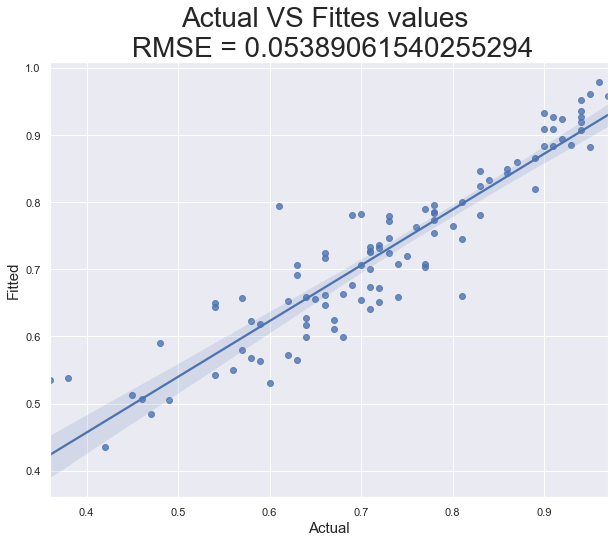

In [37]:
plt.figure(figsize=(10,8))
sns.regplot(y_test, lasso.predict(x_test))
plt.title('Actual VS Fittes values \n RMSE = {0}'.format(RMSE_Lasso),size =28)
plt.xlabel('Actual',size = 15)
plt.ylabel('Fitted', size = 15)

Lets see how Partial Least Squares perform on the given dataset.

In [38]:

from sklearn.cross_decomposition import PLSRegression, PLSSVD

from sklearn.preprocessing import scale 
from sklearn import model_selection

(-1.0, 7.3)

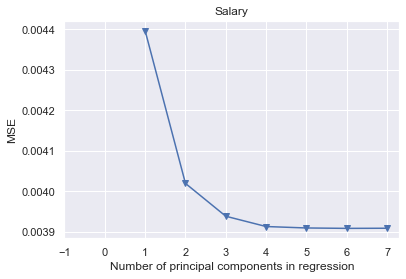

In [39]:
n = len(x_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 8):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(x_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 8), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

As we can see we get best MSE for model with 7 variable which just consolidate what we previously learnt about no. of related variables when we performed Lasso regression.


Now lets try out our a linear regression model with 7 variables, and calculate MSE. Ideally it should produce same results as multliple linear reggression as we did not cut down on the number of variablles.

In [40]:
pls = PLSRegression(n_components=7)
pls.fit(scale(x_train), y_train)

MSE_PLS =mean_squared_error(y_test, pls.predict(scale(x_test)))

In [41]:
Root_mean_squared_error = np.sqrt(MSE_PLS)
Root_mean_squared_error

0.0541624128312599

Results are preety close to Multiple linear regression which has not lost its edge to more sophisticated models.

Now lets try some tree based methods to perform our analysis.

In [42]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
import graphviz

In [43]:
regr_tree_boston = DecisionTreeRegressor(max_depth = 4)
regr_tree_boston.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

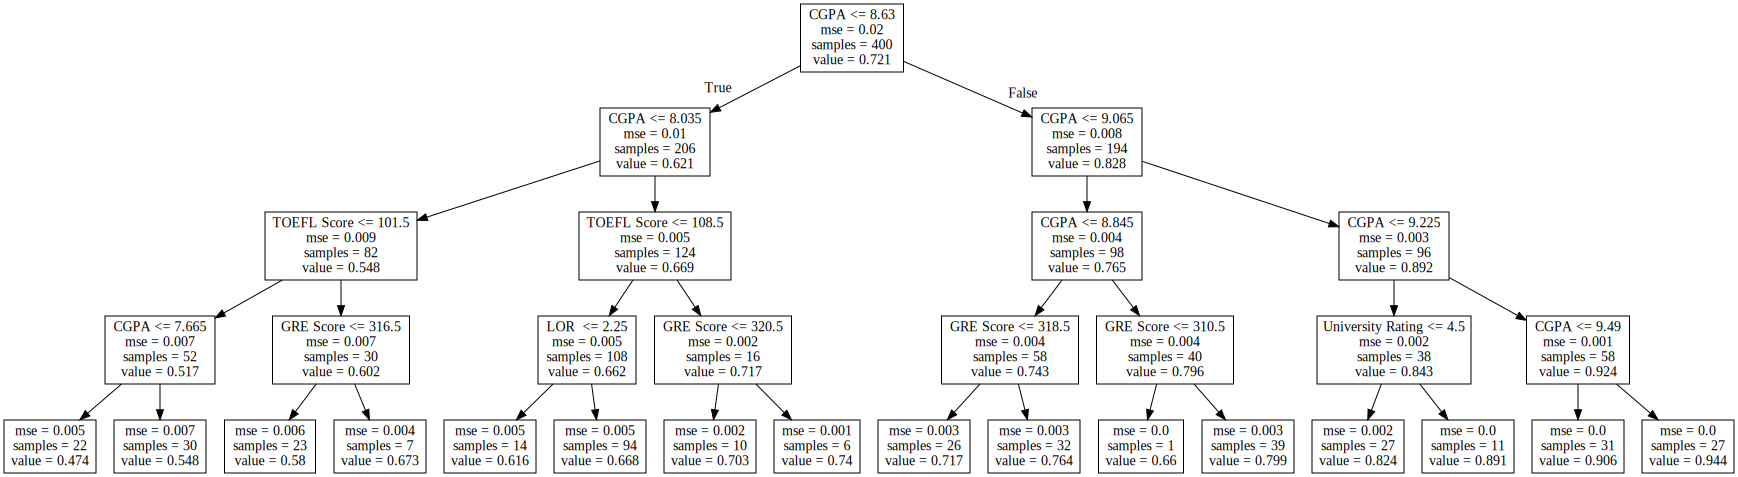

In [44]:

X =data[['GRE Score', 'TOEFL Score','University Rating', 'SOP','LOR ','CGPA','Research']]
export_graphviz(regr_tree_boston, 
                out_file = "boston_tree.dot", 
              feature_names = X.columns  )

with open("boston_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [46]:
model_RT = regr_tree_boston.fit(x_train, y_train)
predit = model_RT.predict(x_test)
MSE_RT =mean_squared_error(y_test, predit)
RMSE_RT =np.sqrt(MSE_RT)
RMSE_RT 

0.06452512655380746

This method has fared worse than all the methods we have used before.

In [47]:
Col_names = data.columns[:-1]
Variable_Importance = pd.DataFrame(Col_names)

In [48]:
Variable_Importance

,0
0,GRE Score
1,TOEFL Score
2,University Rating
3,SOP
4,LOR
5,CGPA
6,Research


In [49]:
Variable_Importance.rename(columns={0:'Feature_Name'},inplace=True)
Variable_Importance

,Feature_Name
0,GRE Score
1,TOEFL Score
2,University Rating
3,SOP
4,LOR
5,CGPA
6,Research


In [50]:
model = regr_tree_boston.fit(x_train, y_train)
Variable_Importance['Importance']= (model.feature_importances_ * 100)

In [51]:
Variable_Importance

,Feature_Name,Importance
0,GRE Score,1.577655
1,TOEFL Score,2.813231
2,University Rating,0.540945
3,SOP,0.000000
4,LOR,0.524156
5,CGPA,94.544012
6,Research,0.000000


In [52]:
Variable_Importance.sort_values(by = ['Importance'],ascending=False, inplace = True)

In [53]:
Variable_Importance

,Feature_Name,Importance
5,CGPA,94.544012
1,TOEFL Score,2.813231
0,GRE Score,1.577655
2,University Rating,0.540945
4,LOR,0.524156
3,SOP,0.000000
6,Research,0.000000


Text(0.5, 1.0, 'Importance of Different Variables')

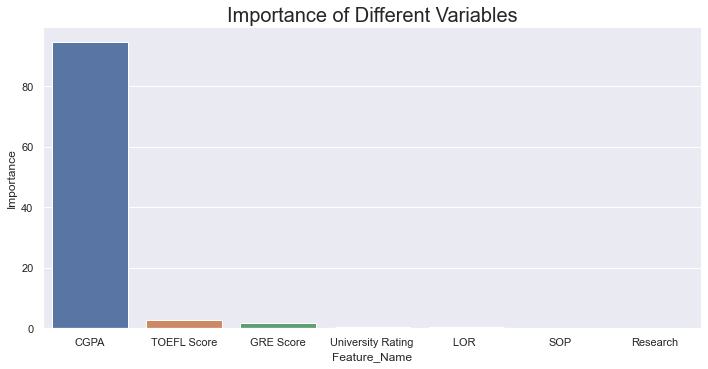

In [54]:
sns.catplot('Feature_Name', 'Importance',data = Variable_Importance,height = 5, aspect = 2, kind = 'bar')
plt.title('Importance of Different Variables', size = 20)

SO, now lets see how a more sophisticated approach Random Forest performs on given dataset

In [55]:
random_forest = RandomForestRegressor(max_features = 3, random_state = 1)

random_forest.fit(x_train, y_train)

pred = random_forest.predict(x_test)
mean_squared_error(y_test, pred)

0.0031933278999999987

In [56]:
RMSE_Random_Forest =np.sqrt(mean_squared_error(y_test, pred))

In [57]:
RMSE_Random_Forest

0.056509538132955915

This is huge improvemnt over the previous method but Linear Regression continues to be the best method so far.

In [58]:
model_RF = random_forest.fit(x_train, y_train)
Importance_RF = pd.DataFrame()
Importance_RF['Importance']= model_RF.feature_importances_*100
Importance_RF['Feature_Names'] = Col_names
Importance_RF.sort_values(by = 'Importance',ascending = False, inplace = True)

In [59]:
Importance_RF

,Importance,Feature_Names
5,43.403746,CGPA
0,20.962160,GRE Score
1,19.892538,TOEFL Score
3,5.921629,SOP
2,4.305144,University Rating
4,3.990167,LOR
6,1.524616,Research


Text(0.5, 1.0, 'Importance of Variables as per Random Forest ')

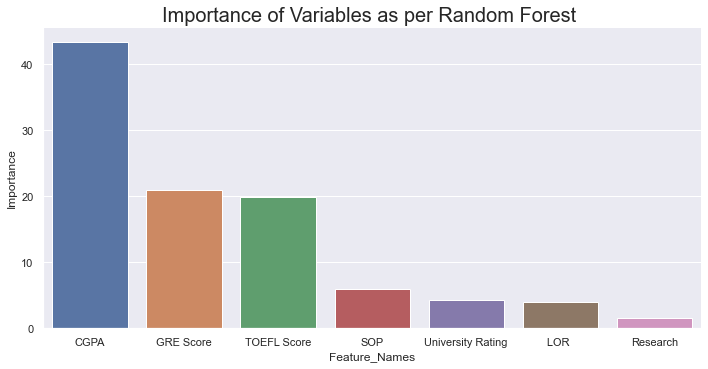

In [60]:
sns.catplot('Feature_Names', 'Importance', data = Importance_RF, kind = 'bar', height = 5, aspect = 2)
plt.title('Importance of Variables as per Random Forest ', size = 20)

# Lets see how Xtreme Gradient Boosting Algorhythm performs on the given dataset

In [75]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(x_train,y_train)

preds = xg_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.062446


So, it has surprisingly fared worse than most of algorhythms and only performing better than regressor trees, however tweaking the boosting parametres can always make a huge difference to the results. But for this dataset its fair to say that old school linear regression model wins. 

# Conclusion
Multiple linear regression has generated better results than any other technique, and it can be concluded that CGPA matters the most while going for admission in universities.